#1. Si colleghi al proprio database

In [ ]:
import numpy as np
import pymongo
import pandas as pd
import matplotlib.pyplot as plt

#2. Crei un dataframe Pandas contenente le informazioni presenti nella collection

In [ ]:
#Collego il link del file csv su un dataframe
df=pd.read_csv("https://raw.githubusercontent.com/wtitze/4E/main/ristoranti.csv")
df

,N,address,borough,cuisine,grades,name,restaurant_id
0,0,"{'building': '8825', 'coord': [-73.8803827, 40...",Queens,American,"[{'date': datetime.datetime(2014, 11, 15, 0, 0...",Brunos On The Boulevard,40356151
1,1,"{'building': '156-71', 'coord': [-73.840437, 4...",Queens,Pizza/Italian,"[{'date': datetime.datetime(2014, 10, 29, 0, 0...",New Park Pizzeria & Restaurant,40364744
2,2,"{'building': '6409', 'coord': [-74.00528899999...",Brooklyn,American,"[{'date': datetime.datetime(2014, 7, 18, 0, 0)...",Regina Caterers,40356649
3,3,"{'building': '2491', 'coord': [-74.1459332, 40...",Staten Island,Delicatessen,"[{'date': datetime.datetime(2015, 1, 9, 0, 0),...",Bagels N Buns,40363427
4,4,"{'building': '56', 'coord': [-74.004758, 40.74...",Manhattan,American,"[{'date': datetime.datetime(2014, 6, 10, 0, 0)...",Old Homestead,40364715
...,...,...,...,...,...,...,...
25354,25354,"{'building': 'ONE', 'coord': [-81.664363600000...",Queens,Other,[],Camden Food Express,50018316
25355,25355,"{'building': '700', 'coord': [-73.988230600000...",Manhattan,Other,[],Wooly'S Nyc,50018495
25356,25356,"{'building': '2144', 'coord': [-73.9552561, 40...",Manhattan,Other,[],Rafi 786,50018553
25357,25357,"{'building': '1448', 'coord': [-73.93032629999...",Brooklyn,Other,[],NaN,50018721


#3. Elimini tutte le colonne ad esclusione di ‘borough’, ‘cuisine’ e ‘name’

In [ ]:
#Droppa tutte le colonne che sono diverse dai nomi delle colonne che ho inserito e poi le elimina dal database
df.drop(df.columns.difference(['borough', 'cuisine', 'name']), axis=1,inplace=True)
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


#4. Conti il numero di ristoranti che hanno ‘Missing’ come quartiere

In [ ]:
#uso il metodo count, fin quando
df[df['borough'] == 'Missing'].count()["borough"]

51

#5. Sostituisca alla parola ‘Missing’ il valore null

In [ ]:
#Faccio un raggruppamento per sapere se c'è il valore missing e quanti ce ne sono.
df.groupby("borough").count()

,cuisine,name
borough,,
Bronx,2338,2322
Brooklyn,6086,6046
Manhattan,10259,10211
Missing,51,51
Queens,5656,5615
Staten Island,969,963


In [ ]:
#rimpiazza la scritta Missing, con nessun valore.
df.replace('Missing',np.nan,inplace=True)
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


In [ ]:
#Faccio un raggruppamento per sapere se il valore missing è stato rimosso dal dataframe
df.groupby("borough").count()

,cuisine,name
borough,,
Bronx,2338,2322
Brooklyn,6086,6046
Manhattan,10259,10211
Queens,5656,5615
Staten Island,969,963


#6. Elimini dal dataframe tutti i ristoranti di cui non si conosce il quartiere

In [ ]:
#Elimina dalla colonna borough tutto ciò che non ha un valore. e lo sostituisce nel database
df.dropna(subset=["borough"],inplace=True)
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,Pizza/Italian,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,Delicatessen,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,Other,Camden Food Express
25355,Manhattan,Other,Wooly'S Nyc
25356,Manhattan,Other,Rafi 786
25357,Brooklyn,Other,NaN


#7. Calcoli il numero di ristoranti per ogni cucina. Ordinare in ordine decrescente a partire dal tipo di cucina che ha più ristoranti

In [ ]:
df["cuisine"].value_counts()

American           6173
Chinese            2412
Café/Coffee/Tea    1210
Pizza              1162
Italian            1069
                   ... 
Iranian               2
Chilean               1
Polynesian            1
Creole/Cajun          1
Californian           1
Name: cuisine, Length: 85, dtype: int64

#8. Visualizzi il tipo di cucina con più ristoranti

In [ ]:
#conta tutti i valori all'interno di cuisine, e stampa solo il valore massimo che ha trovato.
df["cuisine"].value_counts().idxmax()

'American'

#9. Visualizzi un grafico a barre con i primi 10 tipi di cucina

In [ ]:
#g contiene il conteggio di cuisine
g = df["cuisine"].value_counts()

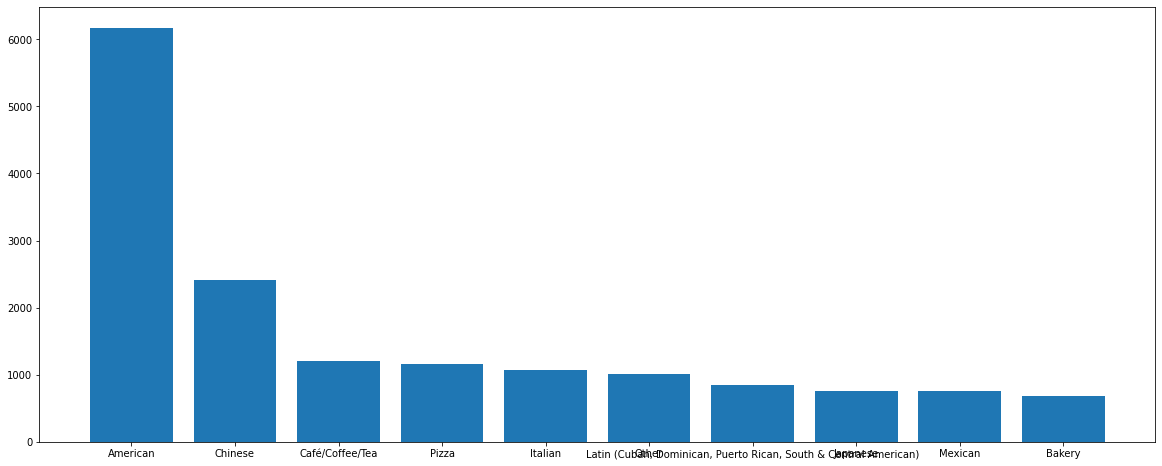

In [ ]:
#Visualizzare il grafico, con le prime dieci cucine del dataframe.
fig,ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(8)
ax.bar(g.index[:10],g[:10])
fig.show()

#10. Calcoli il numero di ristoranti per ogni quartiere

In [ ]:
#attribuisco i dati presenti nella colonna e li attribuisco ad una variabile che ho appena creato.
quartieri = df['borough'].value_counts()
quartieri

Manhattan        10259
Brooklyn          6086
Queens            5656
Bronx             2338
Staten Island      969
Name: borough, dtype: int64

#11. Visualizzi i dati precedenti in un grafico a torta

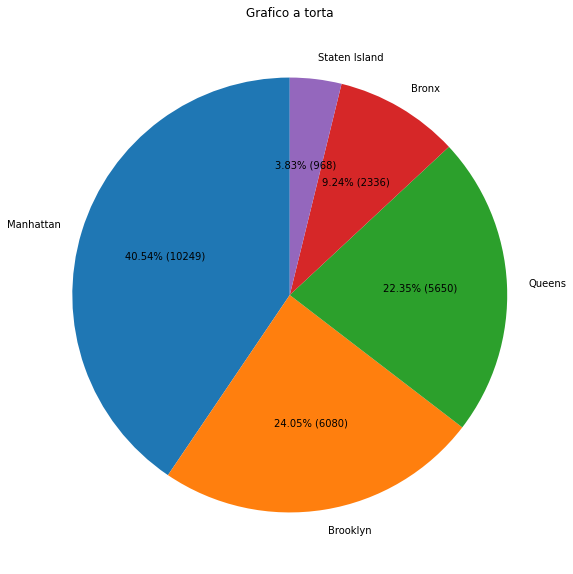

In [ ]:
#creo la torta con il metodo pie, e gli attribuisco i valori(quartieri) e poi mostro la percentuale.
def make_autopct(quartieri):
  def my_autopct(pct):
    total = sum(quartieri)
    val = int(round(pct * total / 100.1))
    return "{p:.2f}% ({v:d})".format(p = pct,v=val) 
  return my_autopct
df2 = df['borough'].value_counts()
fig,ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(10)
ax.set_title("Grafico a torta")
ax.pie(quartieri,autopct= make_autopct(quartieri),labels=df2.index,startangle = 90)
fig.savefig("graficoTorta.png")
fig.show()

#12. Visualizzi i due grafici affiancati. Dare titoli appropriati ad entrambi i grafici.

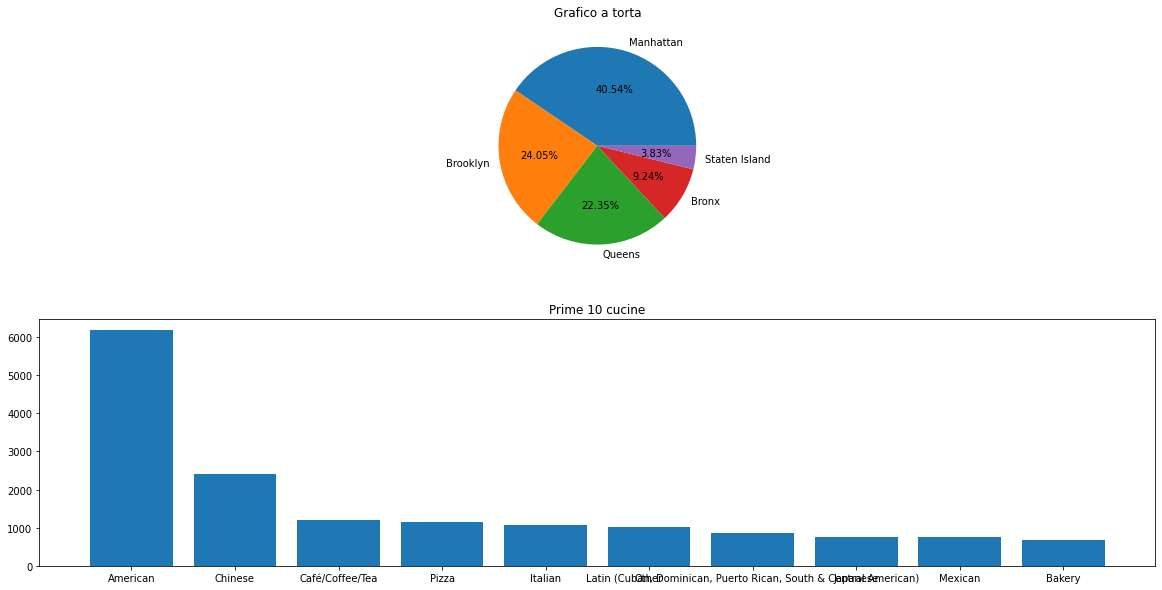

In [ ]:
#Creo una riga e due colonne, e ricollego tutti i dati dei grafici presenti
fig,ax = plt.subplots(2,1)
fig.set_figwidth(20)
fig.set_figheight(10)

ax[1].bar(g.index[:10],g[:10])
ax[1].set_title('Prime 10 cucine')

ax[0].set_title('Percentuali delle cucine')
ax[0].set_title("Grafico a torta")
ax[0].pie(quartieri,autopct= '%1.2f%%',labels=df2.index)
fig.show()

#13. crei un nuovo dataframe sostituendo la parola &#39;non American&#39; a tutti i tipi di cucina che non sono americani

In [ ]:
df["cuisine"].loc[df['cuisine'] !="American"] ='non American'
df

,borough,cuisine,name
0,Queens,American,Brunos On The Boulevard
1,Queens,non American,New Park Pizzeria & Restaurant
2,Brooklyn,American,Regina Caterers
3,Staten Island,non American,Bagels N Buns
4,Manhattan,American,Old Homestead
...,...,...,...
25354,Queens,non American,Camden Food Express
25355,Manhattan,non American,Wooly'S Nyc
25356,Manhattan,non American,Rafi 786
25357,Brooklyn,non American,NaN


#14. visualizzi, per ogni quartiere, il numero di ristoranti di cucina americana e non americana.

In [ ]:
df.groupby(["borough","cuisine"]).count()

name
borough       cuisine           
Bronx         American       411
              non American  1911
Brooklyn      American      1273
              non American  4773
Manhattan     American      3205
              non American  7006
Queens        American      1040
              non American  4575
Staten Island American       244
              non American   719

#16. crei un nuovo dataframe che abbia una colonna che contiene i ristoranti di cucina americana e una colonna che contiene il numero di ristoranti che propongono cucine non americane. Il risultato deve essere il seguente:

In [ ]:
#creo un groupby di entrambe le colonne, le metto in ordine e succesivamente le separo con il metodo unstack
df1 = df.groupby(['borough', 'cuisine']).size().unstack(fill_value=0)
df1

cuisine,American,non American
borough,,
Bronx,411,1927
Brooklyn,1273,4813
Manhattan,3205,7054
Queens,1040,4616
Staten Island,244,725


#18. resetti l&#39;indice in modo da avere le tre colonne necessarie per costruire un grafico a barre. Il risultato
deve essere il seguente:

In [ ]:
#Resetto l'index per vedere il nuovo dataframe
df1.reset_index()

cuisine,borough,American,non American
0,Bronx,411,1927
1,Brooklyn,1273,4813
2,Manhattan,3205,7054
3,Queens,1040,4616
4,Staten Island,244,725


#20. Visualizzi un istogramma in cui per ogni quartiere si visualizzi una barra con il numero dei ristoranti
americani ed una per quelli non americani. Il risultato deve essere il seguente:

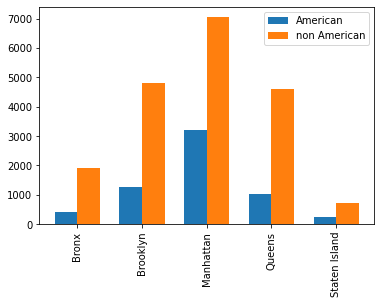

In [ ]:
y = df1.index.tolist()
x = np.arange(len(y))  
#questa corrisponde alla larghezza delle barre e useremo questo valore per affiancare gli altri dati
width = 0.35 
fig,ax = plt.subplots()
#creo la prima asse , tramite la sottrazione del width alla x che è la lungezza della y
ax.bar(x - width/2,df1.American,width)
#creo la seconda asse su cui attirbuisco altri valori, affiancandolo tramite la somma del width
ax.bar(x + width/2,df1['non American'],width)
plt.xticks(x, y)
#attribuisco la rotazione del grafico
plt.xticks(rotation=90)
#creo la legenda
ax.legend(["American",'non American'])
plt.show()